<a href="https://colab.research.google.com/github/rodriquiel/Analisis_DB_Tarjetas_Credito/blob/main/AnalisisDBconTarjetasCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando base de datos

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv("credit_card.csv")
datos.head(15)

,LIMIT_BAL,CHECKING_ACCOUNT,EDUCATION,MARRIAGE,AGE,BILL_AMT,PAY_AMT,DEFAULT
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
5,30110,Yes,2.University,Single,23,114.4180,114.4180,0
6,42154,Yes,1.High School,Married,28,4244.3056,1002.3619,0
7,60220,Yes,1.High School,Single,34,2946.8657,694.3366,0
8,78286,Yes,3.Graduate School,Single,51,6524.8370,6524.8370,0
9,189693,Yes,2.University,Single,41,1957.1500,301.1000,0


###Se considerará no morosas aquellas personas que pagaron algún valor de la factura.

##Informacion general de la base de datos

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         1500 non-null   int64  
 1   CHECKING_ACCOUNT  1500 non-null   object 
 2   EDUCATION         1500 non-null   object 
 3   MARRIAGE          1500 non-null   object 
 4   AGE               1500 non-null   int64  
 5   BILL_AMT          1500 non-null   float64
 6   PAY_AMT           1500 non-null   float64
 7   DEFAULT           1500 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


###No se observan NaN en ninguna de las columnas, lo que facilita el tratamiento de los datos

#Traduccion de variables y columnas

##Columnas

In [ ]:
datos.columns

Index(['LIMIT_BAL', 'CHECKING_ACCOUNT', 'EDUCATION', 'MARRIAGE', 'AGE',
       'BILL_AMT', 'PAY_AMT', 'DEFAULT'],
      dtype='object')

In [ ]:
dic_col = {
    'LIMIT_BAL': 'limite',
    'CHECKING_ACCOUNT': 'cuenta_corriente',
    'EDUCATION': 'escolaridad', 
    'MARRIAGE': 'estado_civil', 
    'AGE': 'edad',
    'BILL_AMT': 'valor_factura', 
    'PAY_AMT': 'valor_pago', 
    'DEFAULT': 'moroso'
}

In [ ]:
tarjetas = datos.rename(columns = dic_col)

In [ ]:
tarjetas.head(15)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Yes,2.University,Married,24,934.0122,0.0000,1
1,36132,Yes,2.University,Single,26,519.3975,0.0000,1
2,27099,Yes,2.University,Single,34,4223.5297,457.0698,0
3,15055,Yes,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
5,30110,Yes,2.University,Single,23,114.4180,114.4180,0
6,42154,Yes,1.High School,Married,28,4244.3056,1002.3619,0
7,60220,Yes,1.High School,Single,34,2946.8657,694.3366,0
8,78286,Yes,3.Graduate School,Single,51,6524.8370,6524.8370,0
9,189693,Yes,2.University,Single,41,1957.1500,301.1000,0


##Variables

In [ ]:
tarjetas.cuenta_corriente.unique() #Devuleve valores unicos

array(['Yes', 'No'], dtype=object)

In [ ]:
dic_cc = {
    'Yes': 'Si', 
    'No': 'No'
}

In [ ]:
tarjetas.cuenta_corriente = tarjetas.cuenta_corriente.map(dic_cc)

In [ ]:
tarjetas.head(15)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.University,Married,24,934.0122,0.0000,1
1,36132,Si,2.University,Single,26,519.3975,0.0000,1
2,27099,Si,2.University,Single,34,4223.5297,457.0698,0
3,15055,Si,2.University,Married,37,14522.9563,602.2000,0
4,150550,No,3.Graduate School,Single,29,124060.1253,16560.5000,0
5,30110,Si,2.University,Single,23,114.4180,114.4180,0
6,42154,Si,1.High School,Married,28,4244.3056,1002.3619,0
7,60220,Si,1.High School,Single,34,2946.8657,694.3366,0
8,78286,Si,3.Graduate School,Single,51,6524.8370,6524.8370,0
9,189693,Si,2.University,Single,41,1957.1500,301.1000,0


In [ ]:
tarjetas.escolaridad.unique()

array(['2.University', '3.Graduate School', '1.High School'], dtype=object)

In [ ]:
dic_escol = {
    '2.University': '2.Universidad', 
    '3.Graduate School': '3.Pos-graduacion', 
    '1.High School': '1.Colegio'
}

In [ ]:
tarjetas.escolaridad = tarjetas.escolaridad.map(dic_escol)

In [ ]:
tarjetas.head(15)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Married,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Single,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Single,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Married,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduacion,Single,29,124060.1253,16560.5000,0
5,30110,Si,2.Universidad,Single,23,114.4180,114.4180,0
6,42154,Si,1.Colegio,Married,28,4244.3056,1002.3619,0
7,60220,Si,1.Colegio,Single,34,2946.8657,694.3366,0
8,78286,Si,3.Pos-graduacion,Single,51,6524.8370,6524.8370,0
9,189693,Si,2.Universidad,Single,41,1957.1500,301.1000,0


In [ ]:
tarjetas.estado_civil.unique()

array(['Married', 'Single'], dtype=object)

In [ ]:
dic_ec = {
    'Married': 'Casado/a', 
    'Single': 'Soltero/a'
}

In [ ]:
tarjetas.estado_civil = tarjetas.estado_civil.map(dic_ec)

In [ ]:
tarjetas.head(15)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0
5,30110,Si,2.Universidad,Soltero/a,23,114.4180,114.4180,0
6,42154,Si,1.Colegio,Casado/a,28,4244.3056,1002.3619,0
7,60220,Si,1.Colegio,Soltero/a,34,2946.8657,694.3366,0
8,78286,Si,3.Pos-graduacion,Soltero/a,51,6524.8370,6524.8370,0
9,189693,Si,2.Universidad,Soltero/a,41,1957.1500,301.1000,0


#Uso biblioteca Seaborn

##Biblioteca basica para analisis graficos a partir de DataFrames provenientes de Pandas

In [ ]:
!pip install seaborn #Para instalar Seaborn (se instalan tambien Pandas y matplotlib)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn #Muestra version instalada

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.9/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno, pandas-profiling


In [ ]:
tarjetas.shape

(1500, 8)

In [ ]:
tarjetas.head(15)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0
5,30110,Si,2.Universidad,Soltero/a,23,114.4180,114.4180,0
6,42154,Si,1.Colegio,Casado/a,28,4244.3056,1002.3619,0
7,60220,Si,1.Colegio,Soltero/a,34,2946.8657,694.3366,0
8,78286,Si,3.Pos-graduacion,Soltero/a,51,6524.8370,6524.8370,0
9,189693,Si,2.Universidad,Soltero/a,41,1957.1500,301.1000,0


##Analisis 1: Grafico de distribucion sobre 'limite'

In [ ]:
sns.set_style('darkgrid')

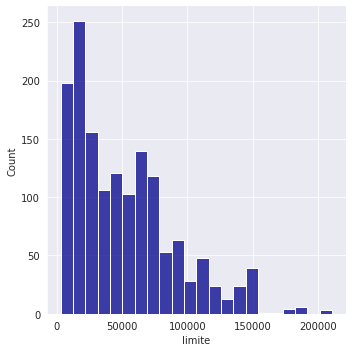

In [ ]:
sns.displot(data = tarjetas, x = 'limite', color = 'darkblue');

###Grafico de distribucion de 'limite' en base a 'escolaridad'

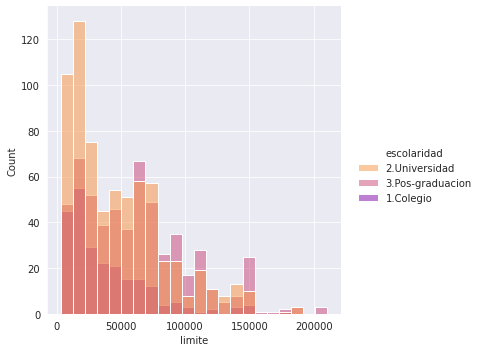

In [ ]:
sns.displot(data = tarjetas, x = 'limite', hue = 'escolaridad', palette = 'plasma_r');

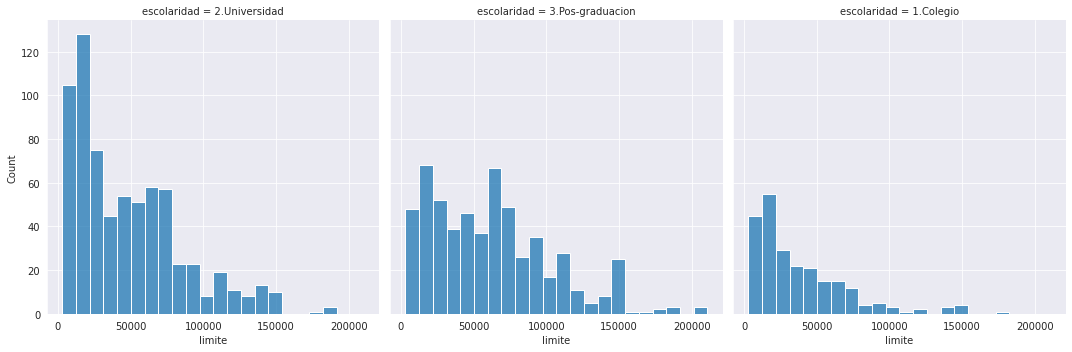

In [ ]:
sns.displot(data = tarjetas, x = 'limite', col = 'escolaridad');

#Analisis 2: Analisis sobre uso del limite disponible en la tarjeta

##Se realiza en base a 'limite' y a 'valor_factura', se usa el concepto de 'indice de uso' (iu)

In [ ]:
tarjetas['iu'] = tarjetas['valor_factura']/tarjetas['limite']

In [ ]:
tarjetas.head(15)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0,0.824046
5,30110,Si,2.Universidad,Soltero/a,23,114.4180,114.4180,0,0.003800
6,42154,Si,1.Colegio,Casado/a,28,4244.3056,1002.3619,0,0.100686
7,60220,Si,1.Colegio,Soltero/a,34,2946.8657,694.3366,0,0.048935
8,78286,Si,3.Pos-graduacion,Soltero/a,51,6524.8370,6524.8370,0,0.083346
9,189693,Si,2.Universidad,Soltero/a,41,1957.1500,301.1000,0,0.010317


###Grafico de distribucion sobre 'iu' para observar tendencias sobre el uso del limite de la tarjeta. Se observa que la mayoria se concentra cerca del 5%, y se observan picos cerca de 10% y 100%

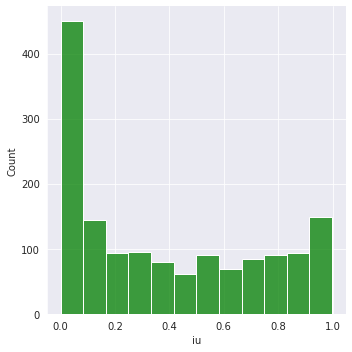

In [ ]:
sns.displot(data = tarjetas, x = 'iu', color= 'green')

#Analisis 3: Analisis de variables categoricas

Variable categorica: hace refenecia a la pertenencia a una categoria ('estado_civil', 'escolaridad', cuenta_corriente)

##Analisis sobre cantidad de personas con cuenta corriente y los morosos dentro de cada categoria

###Al ver el grafico, la cantidad de moroso es practicamente igual en ambas categorias pero representa un mayor porcentaje en el caso de las personas sin cuenta corriente

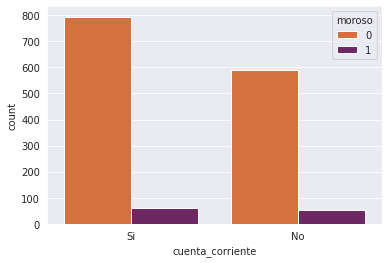

In [ ]:
sns.countplot(data = tarjetas, x = 'cuenta_corriente', hue = 'moroso', palette='inferno_r');

##Analisis relacion entre limite y estado civil

###En este caso, analizando el grafico de dispersion generado, no se observa una diferencia relevante entre el limite y el estado civil

<ipython-input-34-7fad754a210e>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(data = tarjetas, x = 'estado_civil', y ='limite', palette='inferno_r');


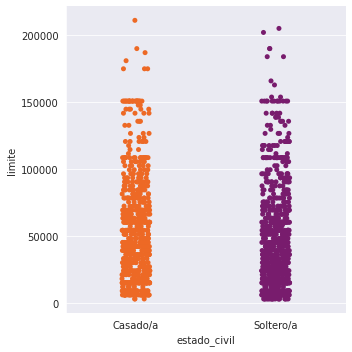

In [ ]:
sns.catplot(data = tarjetas, x = 'estado_civil', y ='limite', palette='inferno_r');

###Se realiza el mismo analisis pero teniendo en cuenta tambien la condicion de moroso, y se observan algunas diferencias: en el caso de los solteros la dispersion se concentra sobre la base del grafico. Tambien puede decirse que las personas morosas tienen mas limite siendo casados que solteros

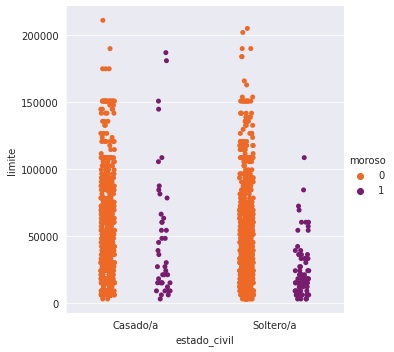

In [ ]:
sns.catplot(data = tarjetas, x = 'estado_civil', y ='limite', hue = 'moroso', dodge=True, palette='inferno_r');

##Analisis sobre el uso de limite de la tarjeta en base al nivel de escolaridad

###Para el caso de universitarios, la dispersion se observa equitativa, mientras que para los otros dos casos se observa, cada una en su medida, una mayor concentracion en los extremos del valor del iu

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='escolaridad', ylabel='iu'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


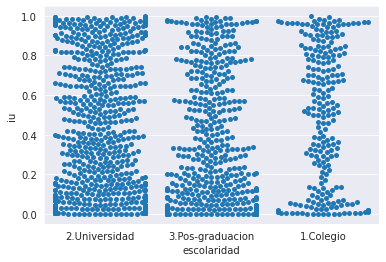

In [ ]:
sns.swarmplot(data = tarjetas, x = 'escolaridad', y = 'iu')

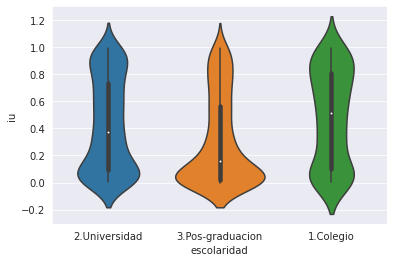

In [ ]:
sns.violinplot(data = tarjetas, x = 'escolaridad', y = 'iu');

##Otro grafico del mismo planteo (box-plot)

###En este caso, se puede observar que a medida que aumenta el nivel de escolaridad, disminuye la media del iu

<Axes: xlabel='escolaridad', ylabel='iu'>

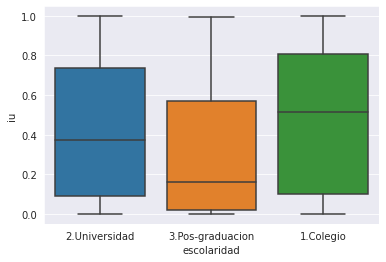

In [ ]:
sns.boxplot(data = tarjetas, x = 'escolaridad', y = 'iu')

##Creacion columna categorica de rangos de edad para analisis sobre la misma

In [ ]:
bins = [20,30,40,50,100]
nombres = ['20-30','30-40','40-50','+50']
tarjetas['rango_edad'] = pd.cut(tarjetas['edad'], bins, labels = nombres)

In [ ]:
tarjetas.head(15)

,limite,cuenta_corriente,escolaridad,estado_civil,edad,valor_factura,valor_pago,moroso,iu,rango_edad
0,6022,Si,2.Universidad,Casado/a,24,934.0122,0.0000,1,0.155100,20-30
1,36132,Si,2.Universidad,Soltero/a,26,519.3975,0.0000,1,0.014375,20-30
2,27099,Si,2.Universidad,Soltero/a,34,4223.5297,457.0698,0,0.155856,30-40
3,15055,Si,2.Universidad,Casado/a,37,14522.9563,602.2000,0,0.964660,30-40
4,150550,No,3.Pos-graduacion,Soltero/a,29,124060.1253,16560.5000,0,0.824046,20-30
5,30110,Si,2.Universidad,Soltero/a,23,114.4180,114.4180,0,0.003800,20-30
6,42154,Si,1.Colegio,Casado/a,28,4244.3056,1002.3619,0,0.100686,20-30
7,60220,Si,1.Colegio,Soltero/a,34,2946.8657,694.3366,0,0.048935,30-40
8,78286,Si,3.Pos-graduacion,Soltero/a,51,6524.8370,6524.8370,0,0.083346,+50
9,189693,Si,2.Universidad,Soltero/a,41,1957.1500,301.1000,0,0.010317,40-50


#Se analiza si las personas pertenecientes a rangos etarios mayores poseen mayor limite en sus tarjetas

###En el grafico de caja se observa que el rango etario con mayor limite en base al analisis es el de 30-40, mientras que los que cuentan con menor limite son de 20-30, lo cual tiene sentido ya que mayormente se trata de gente que esta insertandose en el ambito laboral. Se pueden observar tambien algunos outliers en todos los rangos etarios.

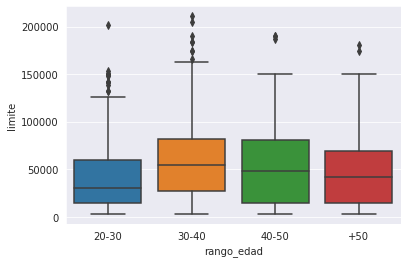

In [ ]:
sns.boxplot(data = tarjetas, x ='rango_edad', y = 'limite');

#Analisis 4: Analisis de variables numericas y regresion

###Grafico de funcion de densidad de 'limite' en base a 'escolaridad'

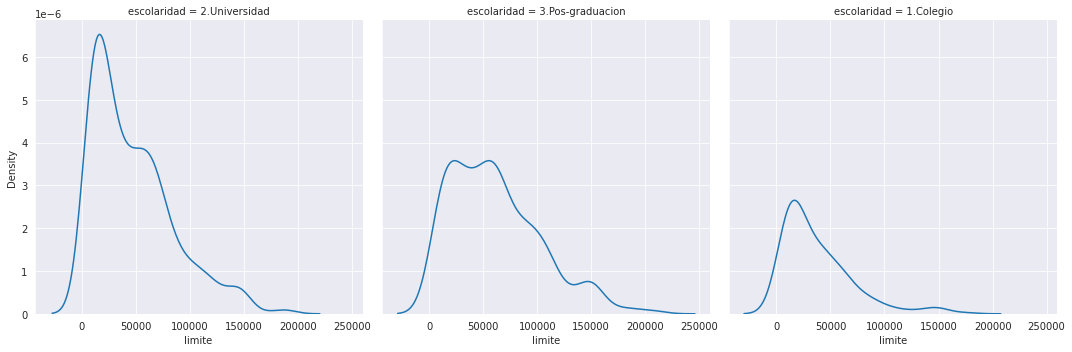

In [ ]:
sns.displot(data = tarjetas, x = 'limite', col = 'escolaridad', kind = 'kde');

###Se agrega el analisis de morosidad

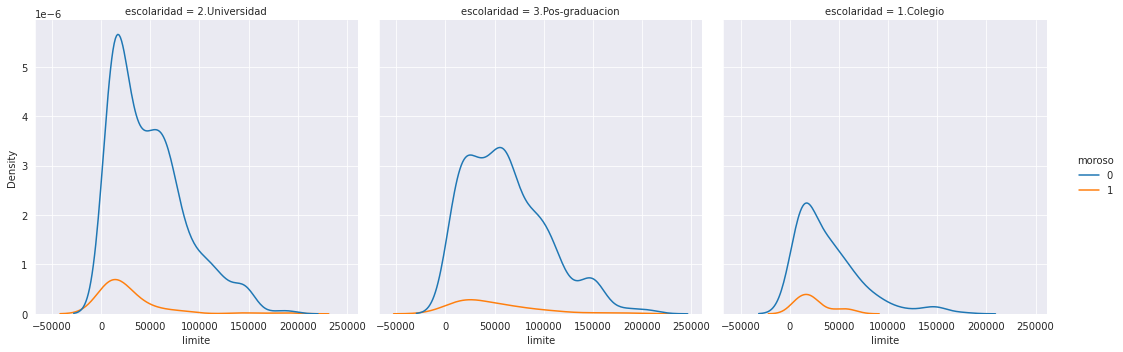

In [ ]:
sns.displot(data = tarjetas, x = 'limite', col = 'escolaridad', kind = 'kde', hue = 'moroso');

###Ahora segun rango de edad

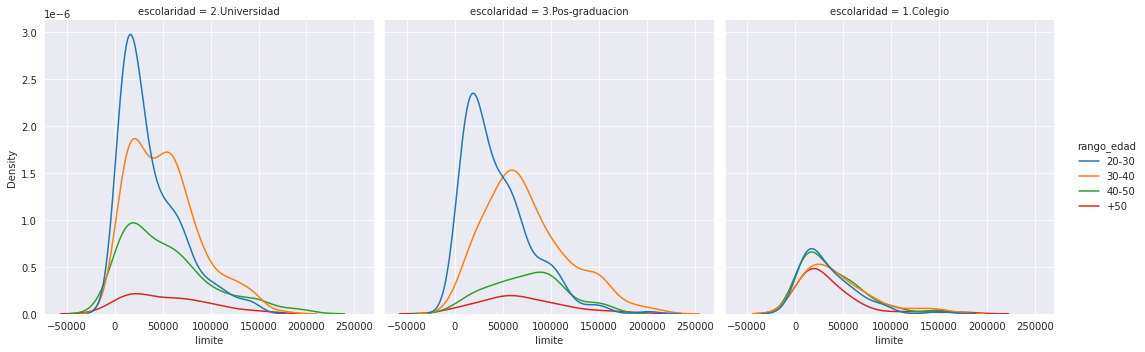

In [ ]:
sns.displot(data = tarjetas, x = 'limite', col = 'escolaridad', kind = 'kde', hue = 'rango_edad');

##Grafico de dispersion de relacion entre valor de factura e indice de uso (iu)

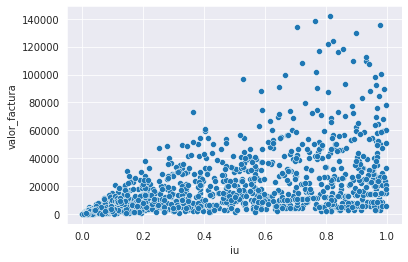

In [ ]:
sns.scatterplot(data = tarjetas, x = 'iu', y = 'valor_factura');

##Se le agrega al analisis la variable de cuenta corriente

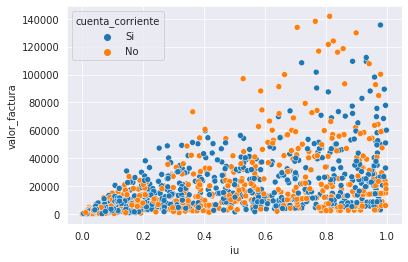

In [ ]:
sns.scatterplot(data = tarjetas, x = 'iu', y = 'valor_factura', hue = 'cuenta_corriente');

##En el siguente grafico, se puede observar la linea de tendencia, la cual muestra que las columnas analizadas son directamente proporcionales

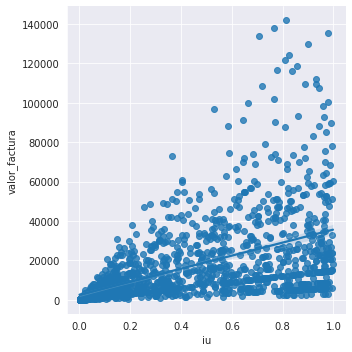

In [ ]:
sns.lmplot(data = tarjetas, x = 'iu', y = 'valor_factura');

##Test de hipotesis

###Se parte desde agregar al analisis la condicion de moroso, viendo dos lineas de tendencia directamente proporcionales pero con diferente inclinacion, por lo que se busca saber si dicha diferenciaa es estadisticamente significativa

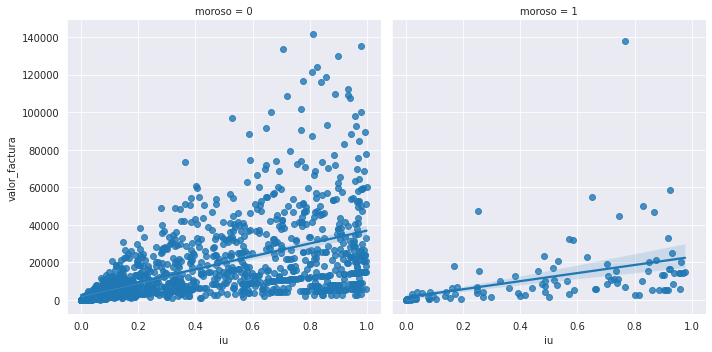

In [ ]:
sns.lmplot(data = tarjetas, x = 'iu', y = 'valor_factura', col = 'moroso');

In [ ]:
from scipy.stats import ranksums

###Planteo de hipotesis

H<sup>0<sup>

La distribucion de los grupos moroso y no moroso es la misma

H<sup>1<sup>

La distribucion de los grupos moroso y no moroso es distinta

In [ ]:
moroso = tarjetas.query("moroso == 1").valor_factura

In [ ]:
moroso

0         934.0122
1         519.3975
38      10891.0881
45        330.6078
47       7316.7300
           ...    
1448     1619.0147
1472    17048.2820
1475     4402.0820
1478     1851.1628
1495      295.0780
Name: valor_factura, Length: 117, dtype: float64

In [ ]:
no_moroso = tarjetas.query("moroso == 0").valor_factura

In [ ]:
no_moroso

2         4223.5297
3        14522.9563
4       124060.1253
5          114.4180
6         4244.3056
           ...     
1494     32698.2556
1496     23637.8555
1497       962.9178
1498       864.7592
1499     97022.8508
Name: valor_factura, Length: 1383, dtype: float64

###Al obtener un pvalue por debajo del 0.05 (5%) se puede aceptar la hipotesis alternativa como cierta para el caso planteado

In [ ]:
ranksums(moroso,no_moroso)

RanksumsResult(statistic=-2.562530598426702, pvalue=0.010391243081223555)

In [ ]:
resultado = ranksums(moroso,no_moroso)

In [ ]:
print("El p_value del test realiado es {}".format(resultado.pvalue.round(5)))

El p_value del test realiado es 0.01039


#Analisis 4: Analisis conjunto de variables

##Relacion entre 'edad' y 'limite' mediante grafico de dispersion

###Los siguietes graficos permiten visualizar al mismo tiempo como es la distribución individual de una variable y cómo se relaciona con otra variable con la que se desea hacer comparaciones

###Se puede observar la concentracion en distintos valores de limite en base a la edad de los individuos

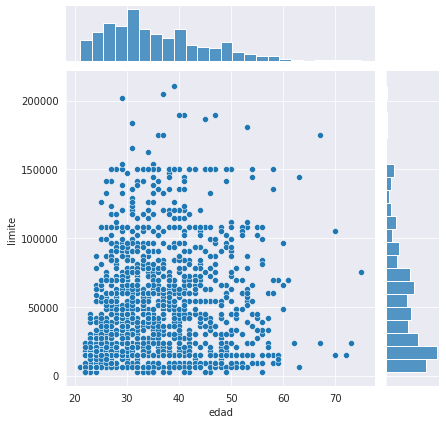

In [ ]:
sns.jointplot(data = tarjetas, x = 'edad', y = 'limite');

###Mismo resultado desde una visual distinta

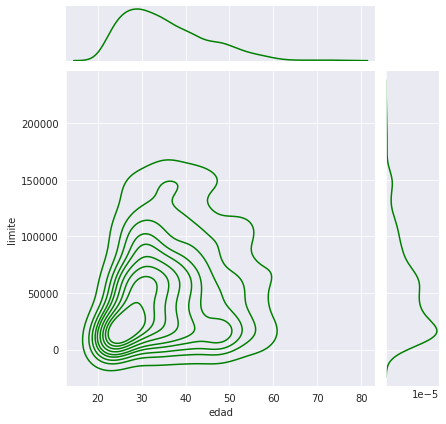

In [ ]:
sns.jointplot(data = tarjetas, x = 'edad', y = 'limite', kind = 'kde', color = 'green');

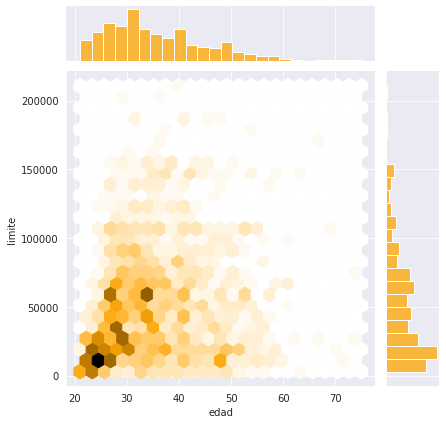

In [ ]:
sns.jointplot(data = tarjetas, x = 'edad', y = 'limite', kind = 'hex', color = 'orange');

##Ahora, se supone el caso en el cual no se conocen los datos de la base y se quiere realizar un analisis rapido para tener una primera impresion de los datos con los cuales se va a trabajar

###Algunos datos estadisticos sobre las columnas con tipo de dato numerico

In [ ]:
tarjetas.describe()

,limite,edad,valor_factura,valor_pago,moroso,iu
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,51221.943333,35.212667,15459.869900,1984.869266,0.078000,0.388237
std,39424.407462,9.274955,20722.582831,5296.771686,0.268261,0.341923
min,3011.000000,21.000000,27.701200,0.000000,0.000000,0.000188
25%,18066.000000,28.000000,2035.586550,407.011925,0.000000,0.049209
50%,42154.000000,33.500000,7701.385250,759.374200,0.000000,0.308976
75%,72264.000000,41.000000,20671.568850,1705.279850,0.000000,0.704090
max,210770.000000,75.000000,141792.506500,97022.850800,1.000000,0.998010


###Vista visual de los datos estadisticos, se puede observar las relaciones entre las distintas variables, y el histograma de cada variable

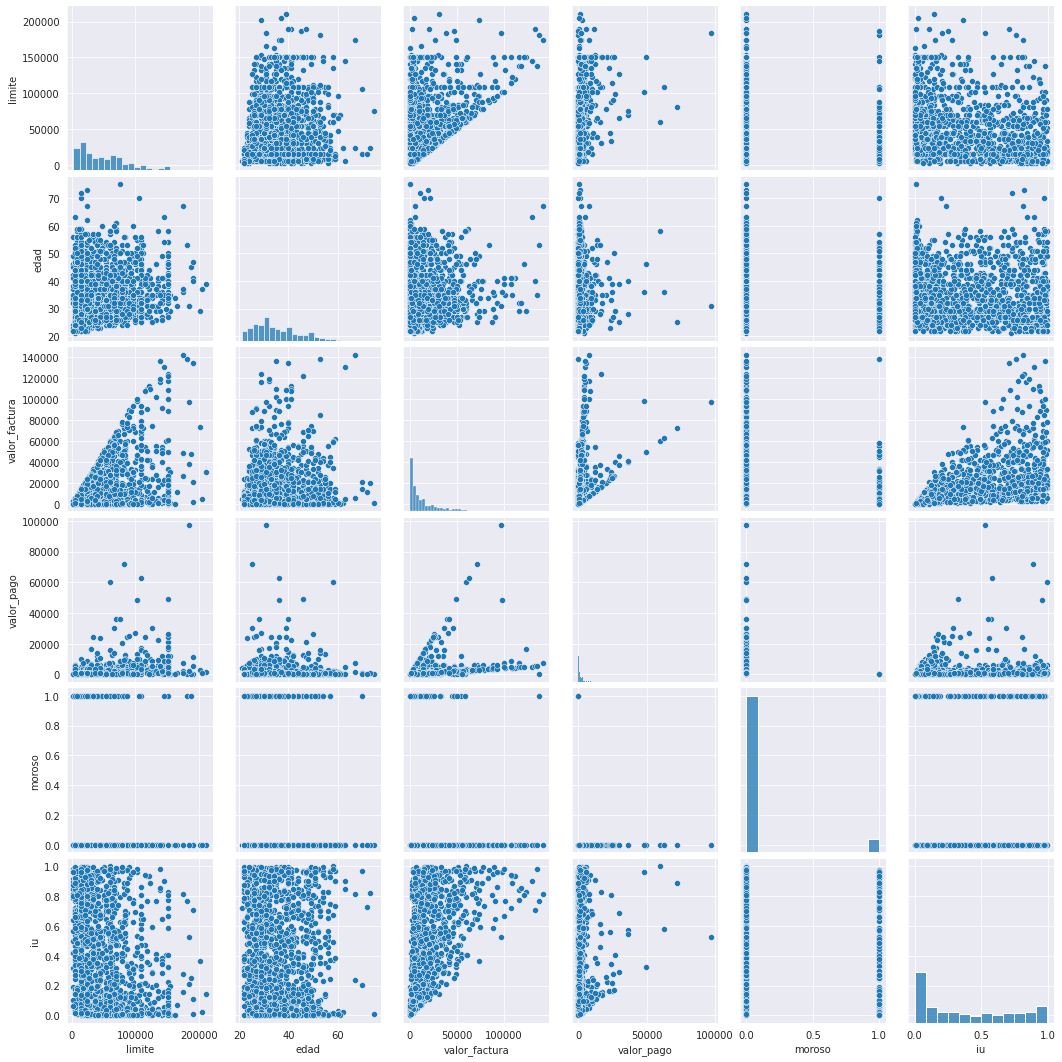

In [ ]:
sns.pairplot(data = tarjetas);

###Se puede aplicar alguna de las variables categoricas para realizar el mismo tipo de analisis. En este caso, se selecciona escolaridad

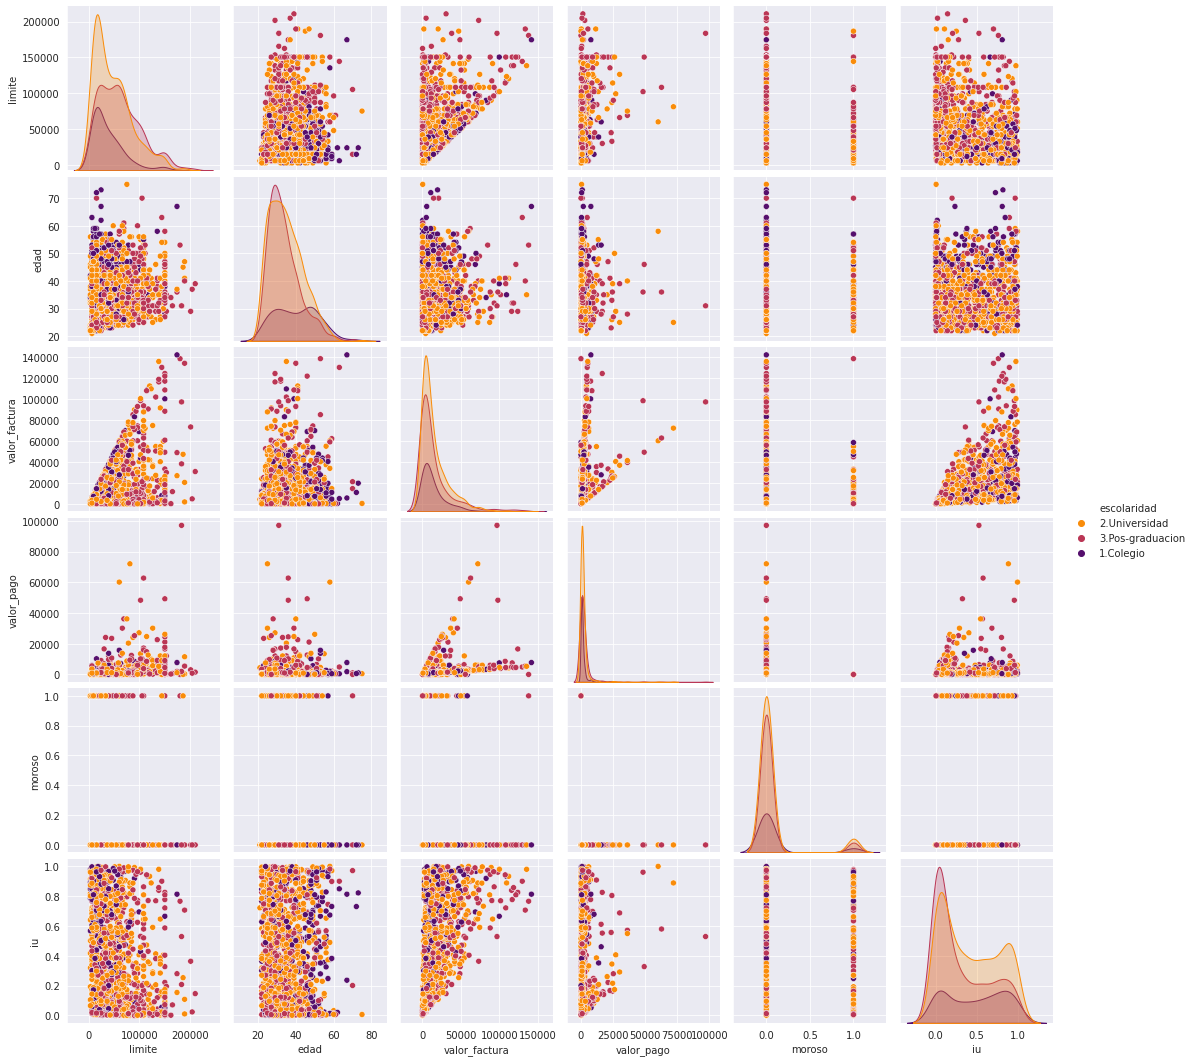

In [ ]:
sns.pairplot(data = tarjetas, hue = 'escolaridad', palette='inferno_r');